# <center>Music Genre Recognition using ML</center>

![genre_pic](https://c4.wallpaperflare.com/wallpaper/408/666/445/music-rock-blues-vintage-wallpaper-preview.jpg)

## Abstract 

Music has always been an integral and maybe inseparable component of many people's daily lives. There are numerous music genres, each of which is distinct from the others, resulting in a wide range of musical preferences. As a result, classifying music and recommending new music in music listening apps and platforms is an important and timely subject. One of the most useful approaches for solving this challenge is to categorize music by genre. Companies such as Saavn, Wynk, Spotify, Apple Music etc., extensively rely on genre to recommend music to their customers.  Categorizing music files based on there is a challenging task in the domain of music information retrieval. There are several methods for categorizing music and one of it is to use acoustic property of music such as instrumentation, pitch, rhythmic structure, and harmonic contents. This project explores various classification algorithms such SVM, Decision Trees, Random Forest, XGBoost.


## Introduction 

Musical genres are labels created and used by humans for categorizing and describing the vast universe of music. Musical genres have no strict definitions and boundaries as they arise through a complex interaction between the public, marketing, historical, and cultural factors. This observation has led some researchers to suggest the definition of a new genre classification scheme purely for the purposes of music information retrieval. Extracting features from audio file (i.e. .mp3, .wav) is the first step. Tempo, RMSE, Zero Crossing Rate, spectral features, chroma features are a few of the features of audio signal. The extracted features are passed as the parameter to predict the target variable i.e., Genre Class. 

The data are extracted using a python library called **librosa**.
Librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems. By using Librosa, we can extract certain key features from the audio samples such as Tempo, Chroma Energy Normalized, Mel-Freqency Cepstral Coefficients, Spectral Centroid, Spectral Contrast, Spectral Rolloff, and Zero Crossing Rate. For further information on this, please click [here](https://medium.com/@patrickbfuller/librosa-a-python-audio-libary-60014eeaccfb)


## Data Set

Free Music Archive (FMA), an open and easily accessible dataset suitable for evaluating several tasks in MIR, a field concerned with browsing, searching, and organizing large music collections. The community's growing interest in feature and end-to-end learning is however restrained by the limited availability of large audio datasets. The FMA aims to overcome this hurdle by providing 917 GiB and 343 days of Creative Commons-licensed audio from 106,574 tracks from 16,341 artists and 14,854 albums, arranged in a hierarchical taxonomy of 161 genres. It provides full-length and high-quality audio, pre-computed features, together with track- and user-level metadata, tags, and free-form text such as biographies. Github: https://github.com/mdeff/fma.

For this analysis we took fma_small dataset which comprises of 8000 tracks of 30s each with 8 balanced genres.
The genres are  
*Electronic
*Experimental
*Folk
*Hip-Hop
*Instrumental
*International
*Pop
*Rock.



## Data Extraction

In [1]:
# Remove '#' and run this cell to install dependency 
#!pip install pandas
#!pip install librosa
#!pip install matplotlib

In [1]:
# Importing the required library
import sys
import warnings
import os
import pandas as pd
import numpy as np
import csv
from numpy import savetxt
import matplotlib.pyplot as plt 
import librosa
import librosa.display
import time
import sklearn
import pickle
from sklearn import preprocessing

if not sys.warnoptions:               # To ignore all types of warning messages 
    warnings.simplefilter("ignore")
    
print(sys.version)                    # To display python version used

3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]


In [41]:
#Loading meta data of the tracks
df_tracks = pd.read_csv("fma_metadata/tracks.csv",header = 1)
df_tracks = df_tracks.drop(labels=0 , axis= 0)
df_tracks = df_tracks.rename({df_tracks.columns[0]:"track_id"},axis='columns')
df_tracks = df_tracks.loc[df_tracks["subset"]=="small"]
req_columns=["track_id","title","title.1","name","bit_rate","duration","genre_top"]
df_tracks = df_tracks[req_columns]
df_tracks.head()

In [43]:
#Removing the unnecessay columns
df_tracks['music_file_name'] = df_tracks['track_id'].astype('str')
df_tracks['music_file_name'] = df_tracks['music_file_name'].apply(lambda x: ('0'*(6-len(x)) + x+'.mp3') if len(x)<6 else x+'.mp3' )
df_tracks.tail()

,track_id,title,title.1,name,bit_rate,duration,genre_top,music_file_name
105714,154308,Journey,MIA,Fleslit,320000.0,194.0,Hip-Hop,154308.mp3
105715,154309,Journey,A1 Symphony,Fleslit,320000.0,162.0,Hip-Hop,154309.mp3
105816,154413,Live at WFMU for Dark Night of the Soul wtih J...,Do Easy,Tasseomancy,320000.0,349.0,Pop,154413.mp3
105817,154414,Live at WFMU for Dark Night of the Soul wtih J...,Dead Can Dance (uncensored),Tasseomancy,320000.0,346.0,Pop,154414.mp3
106386,155066,Horizon,Roy,JBlanked,320000.0,252.0,Hip-Hop,155066.mp3


In [ ]:
# Print the Genre types and the number of instances 
genre = df_tracks['genre_top'].unique()
df_tracks.groupby('genre_top').size()

The dataset is equally distributed among all the genres . i.e Balanced Dataset

In [55]:
# Playing the music 
import IPython.display as ipd
print("Playing A1 Symphony from album Jorney")
ipd.Audio("fma_small/000/000002.mp3")

Playing A1 Symphony from album Jorney


In [57]:
# Getting the path of all the music files
music_path =[]
music_file_name=[]
path ="fma_small/"
fma_small=os.listdir(path)
for folders in fma_small:
    new_path = path + folders +"/"
    if folders != '.DS_Store':
        for music in os.listdir(new_path):
            music_file_name.append(music)
            music_path.append(new_path + music)
df_music = pd.DataFrame(zip(music_file_name,music_path),columns=['music_file_name','path'])            

In [58]:
# Merging the music_path column to new track_detail.csv 
df = pd.merge(df_tracks,df_music)
df.to_csv("tracks_details.csv")
df.head()

,track_id,title,title.1,name,bit_rate,duration,genre_top,music_file_name,path
0,2,AWOL - A Way Of Life,Food,AWOL,256000.0,168.0,Hip-Hop,000002.mp3,fma_small/000/000002.mp3
1,5,AWOL - A Way Of Life,This World,AWOL,256000.0,206.0,Hip-Hop,000005.mp3,fma_small/000/000005.mp3
2,10,Constant Hitmaker,Freeway,Kurt Vile,192000.0,161.0,Pop,000010.mp3,fma_small/000/000010.mp3
3,140,The Blind Spot,Queen Of The Wires,Alec K. Redfearn & the Eyesores,128000.0,253.0,Folk,000140.mp3,fma_small/000/000140.mp3
4,141,Every Man For Himself,Ohio,Alec K. Redfearn & the Eyesores,128000.0,182.0,Folk,000141.mp3,fma_small/000/000141.mp3


In [ ]:
# This code converts all the 8000 audio files in .mp3 to audio time series and save it to a csv file  

start = time.time()
y_list= []
for count,row in enumerate(list(df['path'])):
    if count % 25 == 0:
        print(count)
    y_list.append(librosa.load(row))
print("End_time:"+str(time.time() - start))
y_sr_df = pd.DataFrame(y_list,columns=['y','sr'])
y_sr_df.to_csv("y_sr.csv")

# Visualising Audio files

## Waveform

Waveforms are visual representations of sound as time on the x-axis and amplitude on the y-axis. They are great for allowing us to quickly scan the audio data and visually compare and contrast which genres might be more similar than others. For deeper knowledge on this please click [here.](http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.display.waveplot.html)


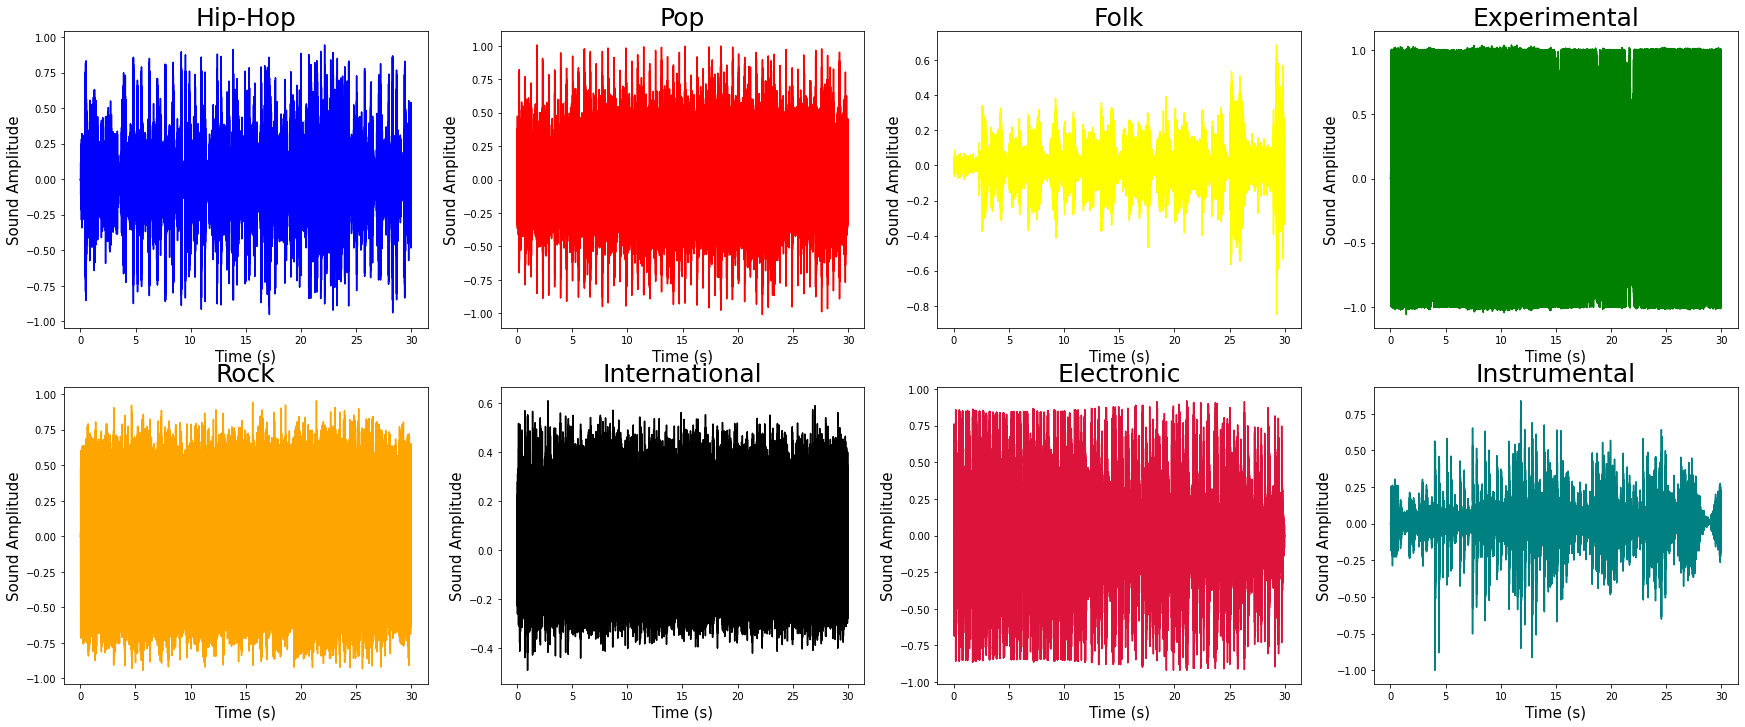

In [62]:
# Ploting waveForm of diffrent genres
d ={}
for x in genre:
    d[x]=list(df[df['genre_top']==x].head(1).path)[0]
color = ["blue","red","yellow","green","orange","black","crimson","teal","saddlebrown"]
plt.rcParams['figure.figsize']=(30,12)
fig,axs = plt.subplots(2,4)
for index , genre_type in enumerate(genre):
    y, sr = librosa.load(d[genre_type])
    t = np.arange(0,len(y))/sr
    axs[index//4,index%4].plot(t,y,color = color[index])
    axs[index//4,index%4].set_title(genre_type , fontsize =25)
    axs[index//4,index%4].set(xlabel='Time (s)',ylabel='Sound Amplitude')
    axs[index//4,index%4].xaxis.label.set_size(15)
    axs[index//4,index%4].yaxis.label.set_size(15)

## Spectrogram

A spectrogram is a visual way of representing the signal loudness of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.
Spectrograms are sometimes called sonographs, voiceprints, or voicegrams. When the data is represented in a 3D plot, they may be called waterfalls. In 2-dimensional arrays, the first axis is frequency while the second axis is time.

In [13]:
y , sr = librosa.load(df.iloc[9,-1])
t = np.arange(0,len(y))/sr

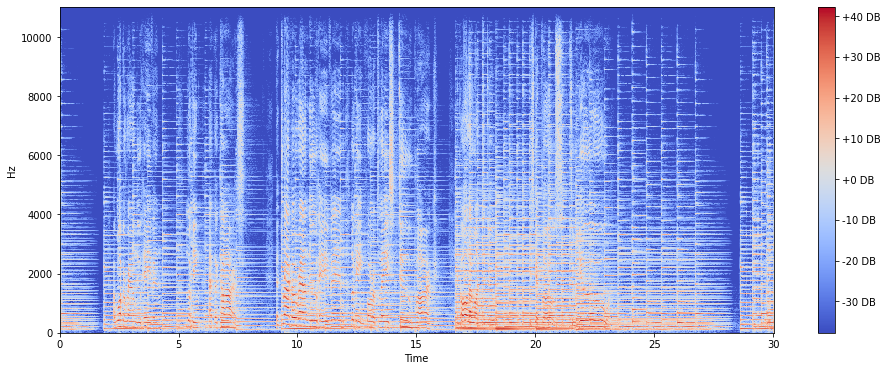

In [14]:
stft = librosa.stft(y)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(16,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar(format='%+2.0f DB')
plt.show()

# Feature Extraction

## Tonnetz
Tonnetz is a 2-dimensional mesh which maps the tonal landscape of western music. It was created back in 1739 by Leonhard Euler as a way to graphically represent the ideas behind [Neo-Riemannian theory.](https://en.wikipedia.org/wiki/Neo-Riemannian_theory).It’s most often used as a technique for analyzing European music, particularly from the unique chord progressions of the Romantic period. For more information click [here](https://jazz-library.com/articles/tonnetz/)

In [68]:
tonnetz = librosa.feature.tonnetz(y , sr =sr)

## Tempo

Tempo is the speed at which a piece of music is played.It is usually expressed in terms of Beats Per Minute (BPM). BPM assisngs a numerical to a tempo. BPM indicates the number of beats in one minute.For instance, a tempo notated as 60 BPM would mean that a beat sounds exactly once per second. A 120 BPM tempo would be twice as fast, with two beats per second.



In [69]:
onset_env = librosa.onset.onset_strength(y , sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env,sr=sr)[0]
tempo

161.4990234375

## Zero-Crossing Rate

Zero-crossing rate. is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back.This feature has been used heavily in both speech recognition and music information retrieval, being a key feature to classify percussive sounds. It is typically computed over several frames,
yielding a vector.

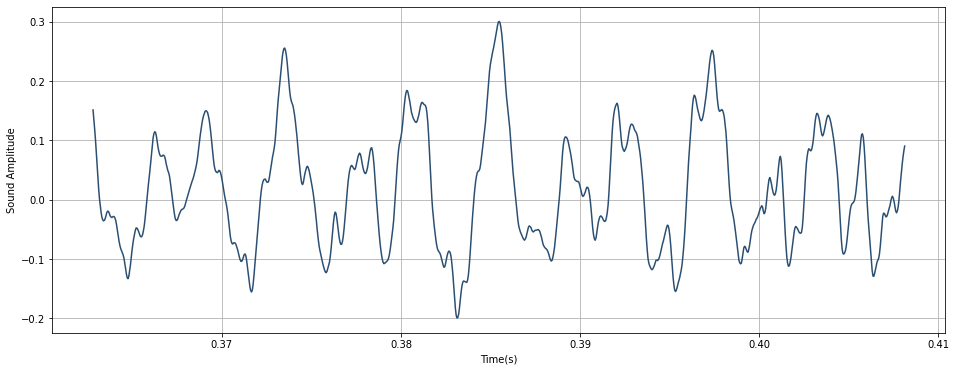

In [70]:
plt.figure(figsize=(16,6))
plt.plot(t[8000:9000],y[8000:9000],color="#2B4F72")
plt.xlabel("Time(s)")
plt.ylabel("Sound Amplitude")
plt.grid()

In [71]:
zero_cross_rate = librosa.zero_crossings(y,pad=False)
print("The number of zero_crossings is : ",(sum(zero_cross_rate)))

The number of zero_crossings is :  27444


## Chroma Features

In Western music, the term chroma feature or chromagram closely relates to the twelve different pitch classes. Chroma-based features, which are also referred to as "pitch class profiles", are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation.

### chroma_stft

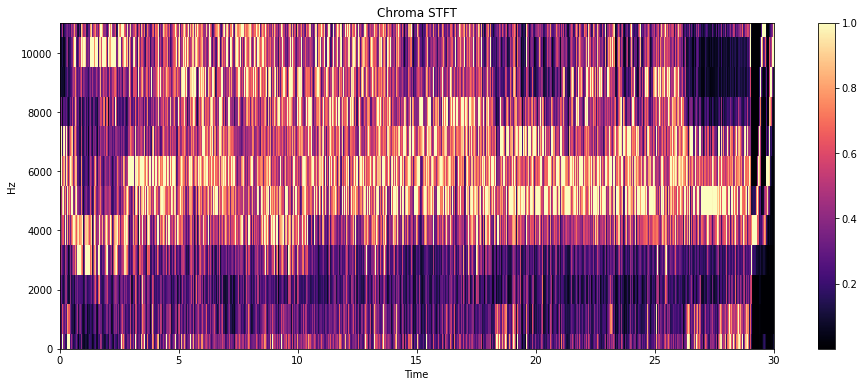

chroma_stft shape:  (12, 1292)


In [72]:
chroma_stft = librosa.feature.chroma_stft(y,sr=sr)
plt.figure(figsize=(16,6))
librosa.display.specshow(chroma_stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()
plt.title("Chroma STFT")
plt.show()
print("chroma_stft shape: ", chroma_stft.shape)

### chroma_cqt

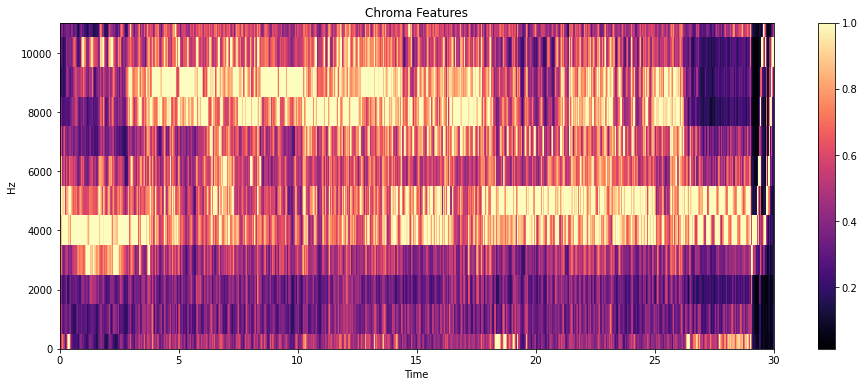

chroma_cqt shape:  (12, 1292)


In [73]:
chroma_cqt = librosa.feature.chroma_cqt(y,sr=sr)
plt.figure(figsize=(16,6))
librosa.display.specshow(chroma_cqt,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()
plt.title("Chroma Features")
plt.show()
print("chroma_cqt shape: ", chroma_cqt.shape)

### chroma_cens

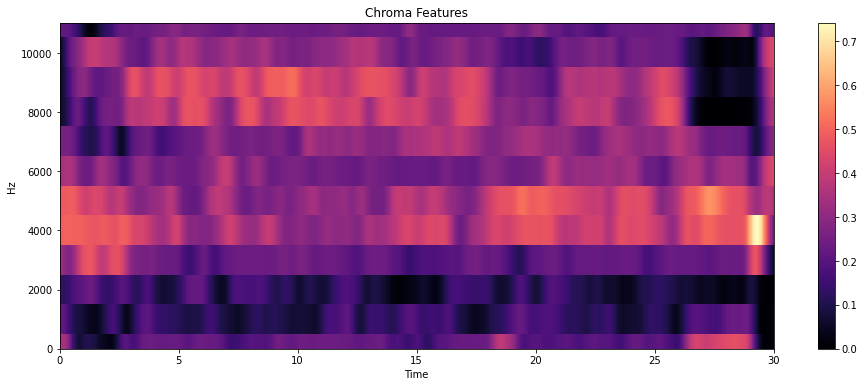

chroma_cens shape:  (12, 1292)


In [74]:
chroma_cens = librosa.feature.chroma_cens(y,sr=sr)
plt.figure(figsize=(16,6))
librosa.display.specshow(chroma_cens,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()
plt.title("Chroma Features")
plt.show()
print("chroma_cens shape: ", chroma_cens.shape)

## Spectral Features

### Spectral Centroid

The spectral centroid is a measure used in digital signal processing to characterise a spectrum. It indicates
where the "center of mass" of the spectrum is located. Perceptually,it has a robust connection with the impression of "brightness" of a sound.

### Spectral Rolloff

This is a measure measure of the amount of the right-skewedness of the power spectrum.

### Spectral Bandwidth

Spectral width is the wavelength interval over which the magnitude of all spectral components is equal to or greater than half of the magnitude of the component having the maximum value.

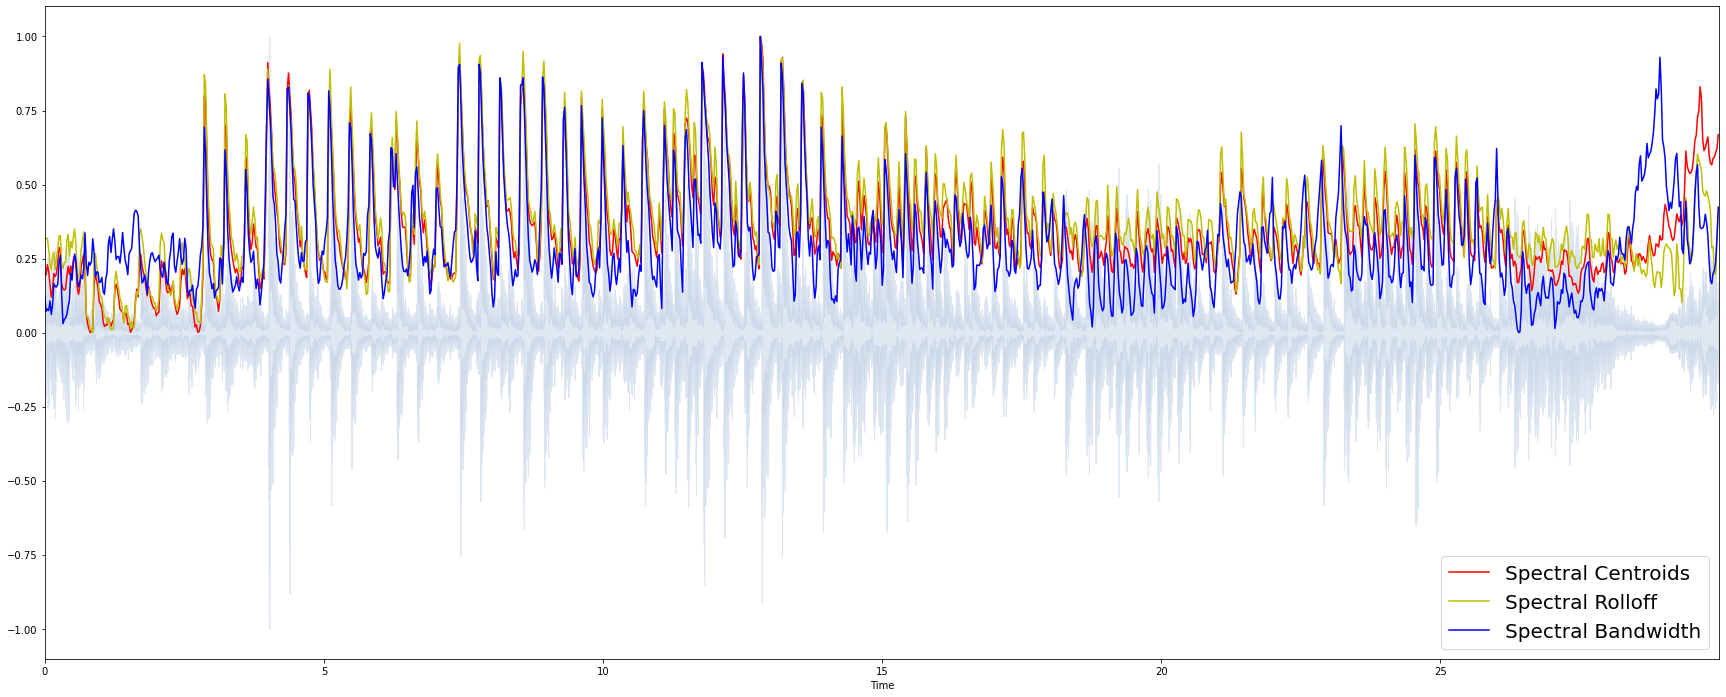

Spectral Centroid  shape:  (1292,)
Spectral  Rolloff  shape:  (1292,)
Spectral Bandwidth shape:  (1292,)


In [75]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01 ,sr =sr)[0]
spectral_bandwidth = librosa.feature.spectral_bandwidth(y,sr=sr)[0]


# Computing the time variable for visualization:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Function to normalize the spectral centroid for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

librosa.display.waveplot(y,sr=sr,alpha=0.4,color="lightsteelblue")
plt.plot(t,normalize(spectral_centroids),color='r',label="Spectral Centroids")
plt.plot(t,normalize(spectral_rolloff),color='y',label ="Spectral Rolloff")
plt.plot(t,normalize(spectral_bandwidth),color='b',label ="Spectral Bandwidth")
plt.legend(loc=4, prop={'size': 20})
plt.show()

plt.show()
print("Spectral Centroid  shape: ", spectral_centroids.shape)
print("Spectral  Rolloff  shape: ", spectral_rolloff.shape)
print("Spectral Bandwidth shape: ", spectral_bandwidth.shape)

#### Taking a closer look

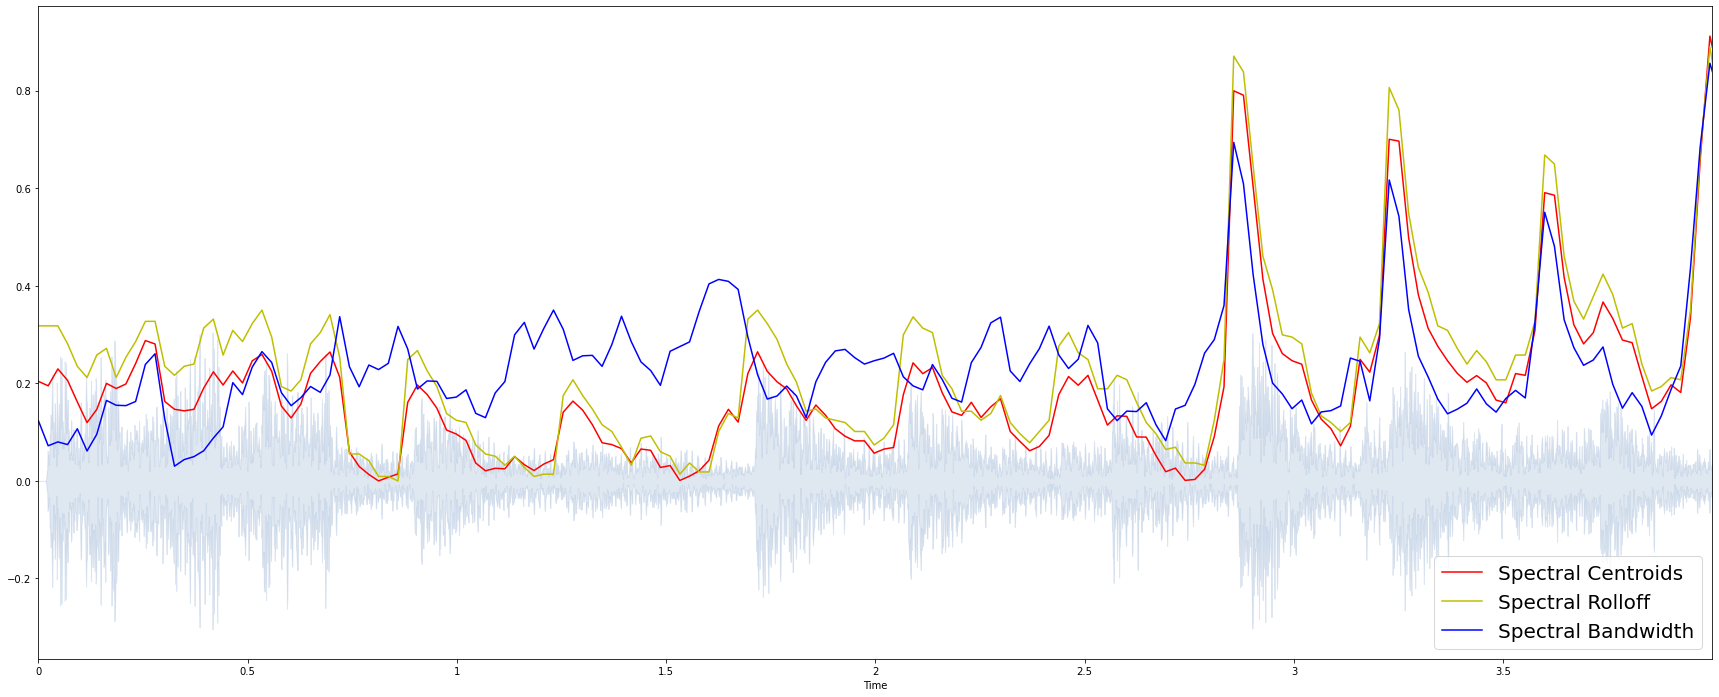

In [76]:
librosa.display.waveplot(y[:88240],sr=sr,alpha=0.4,color="lightsteelblue")
plt.plot(t[:175],normalize(spectral_centroids)[:175],color='r',label="Spectral Centroids")
plt.plot(t[:175],normalize(spectral_rolloff)[:175],color='y',label="Spectral Rolloff")
plt.plot(t[:175],normalize(spectral_bandwidth)[:175],color='b',label="Spectral Bandwidth")
plt.legend(loc=4, prop={'size': 20})
plt.show()

## RSME

 Root Mean Squared Energy. The energy of a signal corresponds to the total magnitude of the signal.For audio signals, that roughly corresponds to how loud the signal is. 

(1292,)

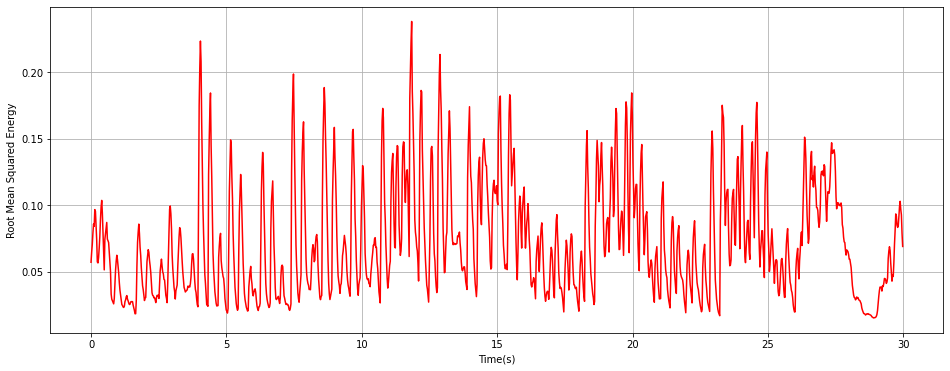

In [77]:
rmse = librosa.feature.rms(y)[0]
plt.figure(figsize=(16,6))
plt.plot(t,rmse,color="red")
plt.xlabel("Time(s)")
plt.ylabel("Root Mean Squared Energy")
plt.grid()
rmse.shape

## Mel-Frequency Cepstral Coefficients (MFCCs)

In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal spectrum. This frequency warping can allow for better representation of sound,

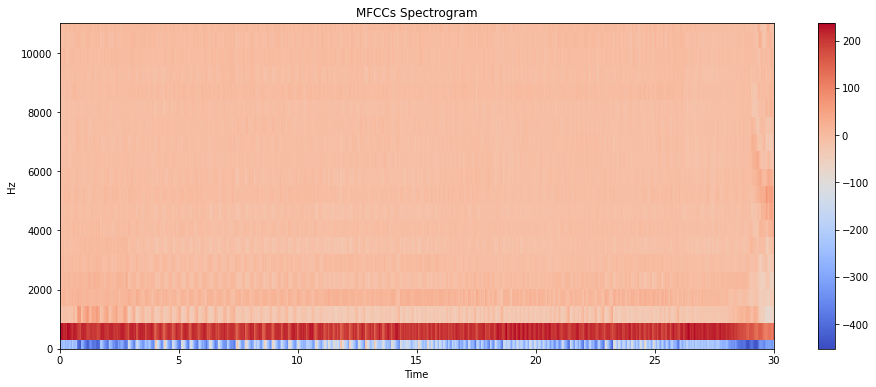

MFCCs shape:  (20, 1292)


In [78]:
mfccs = librosa.feature.mfcc(y,sr=sr)
plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs , sr =sr , x_axis = 'time',y_axis='hz')
plt.colorbar()
plt.title("MFCCs Spectrogram")
plt.show()
print("MFCCs shape: ", mfccs.shape)

## The Mel Scale Spectrogram

The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. This Mel Scale is constructed such that sounds of equal distance from each other on the Mel Scale, also “sound” to humans as they are equal in distance from one another. In contrast to Hz scale, where the difference between 500 and 1000 Hz is obvious, whereas the difference between 7500 and 8000 Hz is barely noticeable. A Mel Scale Spectrogram is a spectrogram with the Mel Scale on its y axis.

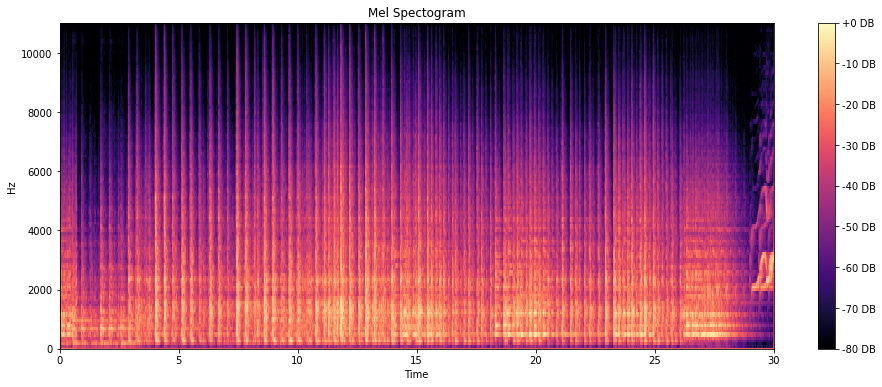

Mel Scale shape:  (128, 1292)


In [79]:
mel_spect = librosa.feature.melspectrogram(y,sr=sr,n_fft = 2048 , hop_length=512,n_mels = 128)
mel_spect = librosa.power_to_db(mel_spect,ref=np.max)
plt.figure(figsize=(16,6))
librosa.display.specshow(mel_spect,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar(format='%+2.0f DB')
plt.title("Mel Spectogram")
plt.show()
print("Mel Scale shape: ", mel_spect.shape)


# Extraction of Feature from all 8000 music files 

In [ ]:
# This cell compute the final set of features . It takes ita a lengthy process
#You can directly load "feature_final.pkl" to dataframe and start working

start = time.time()
collection = []
counter = 1
for y in y_sr_df['y']:
    
    
    tonnetz = librosa.feature.tonnetz(y,sr = 22050)
    tonnetz_mean = np.mean(tonnetz , axis=1)
    tonnetz_std = np.std(tonnetz ,axis =1)
    
    tempo = librosa.beat.tempo(onset_envelope=librosa.onset.onset_strength(y , sr=22050),sr=22050)[0]
    
    zero_crossing_rate = sum(librosa.zero_crossings(y,pad=False))
    
    rmse = librosa.feature.rms(y)
    rmse_mean = np.mean(rmse,axis=1)[0]
    rmse_std =np.std(rmse,axis=1)[0]
    
    chroma_stft=librosa.feature.chroma_stft(y,sr=22050)
    chroma_stft_mean = np.mean(chroma_stft,axis=1)
    chroma_stft_std = np.std(chroma_stft,axis=1)
    
    chroma_cqt = librosa.feature.chroma_cqt(y,sr=22050)
    chroma_cqt_mean = np.mean(chroma_cqt,axis=1)
    chroma_cqt_std = np.std(chroma_cqt,axis=1)
    
    chroma_cens = librosa.feature.chroma_cens(y,sr=22050)
    chroma_cens_mean = np.mean(chroma_cens,axis=1)
    chroma_cens_std=np.std(chroma_cens,axis=1)
    
    spectral_centroid = librosa.feature.spectral_centroid(y, sr=22050)[0]
    spectral_centroid_mean = np.mean(spectral_centroid)
    spectral_centroid_std = np.std(spectral_centroid)
    
    spectral_rolloff=librosa.feature.spectral_rolloff(y, sr=22050)[0]
    spectral_rolloff_mean = np.mean(spectral_rolloff)
    spectral_rolloff_std = np.std(spectral_rolloff)
    
    spectral_bandwidth=librosa.feature.spectral_bandwidth(y, sr=22050)[0]
    spectral_bandwidth_mean=np.mean(spectral_bandwidth)
    spectral_bandwidth_std=np.std(spectral_bandwidth)
    
    mfccs = librosa.feature.mfcc(y,sr=22050)
    mfccs_mean = np.mean(mfccs,axis=1)
    mfccs_std = np.std(mfccs ,axis=1)
    
    mel_spect = librosa.feature.melspectrogram(y,sr=22050,n_fft = 2048 , hop_length=512,n_mels = 128)
    mel_spect_mean = np.mean(mel_spect,axis=1)
    mel_spect_std = np.std(mel_spect,axis=1)
    
    
    
    counter+=1
    
    collection.append([tonnetz_mean,tonnetz_std,tempo,zero_crossing_rate,rmse,
                      chroma_stft_mean,chroma_stft_std,chroma_cqt_mean,chroma_cqt_std,
                      chroma_cens_mean,chroma_cens_std,
                      spectral_centroid_mean,spectral_centroid_std,spectral_rolloff_mean,
                      spectral_rolloff_std,spectral_bandwidth_mean,spectral_bandwidth_std,
                      mfccs_mean,mfccs_std,
                      mel_spect_mean,mel_spect_std])
    if counter % 25 == 0:
        print(counter , time.time()-start) 
print("End: ",time.time()-start)

columns_name = ["tonnetz_mean","tonnetz_std","tempo","zero_crossing_rate","rmse",
                      "chroma_stft_mean","chroma_stft_std","chroma_cqt_mean","chroma_cqt_std",
                      "chroma_cens_mean","chroma_cens_std",
                      "spectral_centroid_mean","spectral_centroid_std","spectral_rolloff_mean",
                      "spectral_rolloff_std","spectral_bandwidth_mean","spectral_bandwidth_std",
                      "mfccs_mean","mfccs_std",
                      "mel_spect_mean","mel_spect_std"]   


a = pd.DataFrame(collection,columns=columns_name)
final = pd.DataFrame()

for name in columns_name:
    if a[name][0].shape != () and a[name][0].shape != (1,) :
        for x in range(a[name][0].shape[0]):
            final[name+"_"+str(x+1)] = a[name].apply(lambda row: row[x])
    else:
        final[name] = a[name].apply(lambda row: row)
final = pd.merge(pd.read_pickle("feature_final.pkl"),
                 pd.read_csv("tracks_details.csv",
                             usecols=['genre_top']),left_index =True,right_index=True)
final.to_pickle("feature_final.pkl")

In [38]:
final.to_pickle("feature_final.pkl")

In [39]:
final = pd.read_pickle("feature_final.pkl")

In [40]:
final.head()

,tonnetz_mean_1,tonnetz_mean_2,tonnetz_mean_3,tonnetz_mean_4,tonnetz_mean_5,tonnetz_mean_6,tonnetz_std_1,tonnetz_std_2,tonnetz_std_3,tonnetz_std_4,...,mel_spect_std_123,mel_spect_std_124,mel_spect_std_125,mel_spect_std_126,mel_spect_std_127,mel_spect_std_128,rmse_mean,rmse_std,music_name,Genre
0,0.009441,0.061125,-0.005547,0.046216,0.002150,0.020969,0.027811,0.056467,0.047940,0.060074,...,0.266111,0.230143,0.182443,0.132342,0.041315,0.003829,0.145178,0.078912,Food,Hip-Hop
1,0.001029,-0.005705,0.010906,0.038095,0.001257,-0.012211,0.039079,0.025971,0.075580,0.058695,...,0.026175,0.032868,0.043989,0.030101,0.009164,0.000639,0.148776,0.080983,This World,Hip-Hop
2,-0.067273,-0.088674,-0.000412,-0.072081,0.010268,0.017728,0.038573,0.047049,0.064518,0.048021,...,0.052758,0.060249,0.082054,0.051162,0.009752,0.000777,0.188128,0.044865,Freeway,Pop
3,0.063295,0.174332,-0.094739,-0.012694,-0.029565,-0.021513,0.205562,0.174711,0.169259,0.274292,...,0.020532,0.019369,0.029723,0.016679,0.006230,0.000486,0.069225,0.038056,Queen Of The Wires,Folk
4,-0.017803,0.147449,-0.066039,-0.089968,0.007785,-0.001817,0.211706,0.151958,0.244264,0.187532,...,0.029067,0.025548,0.022800,0.013572,0.004673,0.000288,0.101333,0.078156,Ohio,Folk
